In [5]:
import pandas as pd

# List of file paths to the TSV tables
file_paths = [
    "../data/rnaseq_gene_counts/salmon.merged.gene_counts (1).tsv",
    "../data/rnaseq_gene_counts/salmon.merged.gene_counts (2).tsv",
    "../data/rnaseq_gene_counts/salmon.merged.gene_counts (3).tsv",
    "../data/rnaseq_gene_counts/salmon.merged.gene_counts.tsv"
]



In [6]:
# Initialize an empty DataFrame for merging
merged_df = None

# Loop through the files and merge them on 'gene_id' using an outer join
for file_path in file_paths:
    # Read the current file
    df = pd.read_csv(file_path, sep='\t')
    
    # Ignore the 'gene_name' column if it exists
    if 'gene_name' in df.columns:
        df = df.drop(columns=['gene_name'])
    
    # Merge with the existing DataFrame
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on='gene_id', how='outer')

# Write the merged DataFrame to a new TSV file
output_file = "../data/rnaseq_gene_counts/merged_gene_counts.tsv"
merged_df.to_csv(output_file, sep='\t', index=False)

print(f"Merged table saved to: {output_file}")


Merged table saved to: ../data/rnaseq_gene_counts/merged_gene_counts.tsv


In [3]:
!head ../data/rnaseq_gene_counts/merged_gene_counts.tsv

gene_id	SRX7656957	SRX7656958	SRX7656959	SRX7656960	SRX7656961	SRX7656962	SRX7656963	SRX7656964	SRX7656965	SRX7656966	SRX7656967	SRX7656968	SRX7656969	SRX7656970	SRX7656971	SRX7656972	SRX7656973	SRX7656974	SRX7656975	SRX7656976	SRX7656977	SRX7656978	SRX7656979	SRX7656980	SRX7656981	SRX7656982	SRX7656983	SRX7656984	SRX7656985	SRX7656986	SRX7656987	SRX7656988	SRX7656989	SRX7656990	SRX7656991	SRX7656992	SRX7656993	SRX7656994	SRX7656995	SRX7656996	SRX13037862	SRX13037863	SRX13037864	SRX13037865	SRX13037866	SRX13037867	SRX13037868	SRX13037869	SRX13037870	SRX13037871	SRX9845500	SRX9845501	SRX9845502	SRX9845503	SRX9845504	SRX9845505	SRX9845506	SRX9845507	SRX9845508	SRX9845509	SRX9845510	SRX9845511	SRX9845512	SRX9845513	SRX9845514	SRX9845515	SRX9845516	SRX9845517	SRX9845518	SRX9845519	SRX9845520	SRX9845521	SRX9845522	SRX9845523	SRX9845524	SRX9845525	SRX9845526	SRX9845527	SRX9845528	SRX9845529	SRX9845530	SRX9845531	SRX9845532	SRX9845533	SRX9845534	SRX9845535	SRX9845536	SRX9845537	SRX9845538	SRX

In [5]:
!head -1 ../data/rnaseq_gene_counts/merged_gene_counts.tsv |\
tr '\t' '\n' |\
wc -l

156


there are 155 samples so including the 'gene_id' header there should be 156 strings

In [6]:
#see if any values are NaN
!grep 'NaN' ../data/rnaseq_gene_counts/merged_gene_counts.tsv |\
head

looks like there are values for all genes in the table. Now let's get the meta data

In [7]:
# List all metadata file paths (update the file paths or pattern accordingly)
metadata_files = [
    "../data/SraRunTable.csv",
    "../data/SraRunTable (1).csv",
    "../data/SraRunTable (2).csv",
    "../data/SraRunTable (3).csv"
]


In [35]:
from glob import glob

# Define the columns of interest
columns_of_interest = [
    "Experiment", "infection", "BREED", "treatment",
    "Trait", "tissue", "collection_time", "Collection_Date", "BioProject"
]

# Load and process each file, keeping only the columns of interest
processed_metadata = []
for file in metadata_files:
    # Read metadata file
    metadata = pd.read_csv(file)
    
    # Keep only the desired columns, fill missing columns with NaN
    filtered_metadata = metadata.reindex(columns=columns_of_interest)
    processed_metadata.append(filtered_metadata)

# Combine all metadata into a single DataFrame
merged_metadata = pd.concat(processed_metadata, ignore_index=True)

# Save the merged metadata to a new file
merged_metadata.to_csv("../data/merged_metadata.csv", index=False)
print("Merged metadata saved to 'merged_metadata.csv'")


Merged metadata saved to 'merged_metadata.csv'


In [36]:
!cat ../data/merged_metadata.csv

Experiment,infection,BREED,treatment,Trait,tissue,collection_time,Collection_Date,BioProject
SRX18040064,,ABC_VIMS_Family_2017084,Dose 1x10^6,tolerant,mantle,,6/20/2018,PRJNA894694
SRX18040063,,ABC_VIMS_Family_2017084,Control,tolerant,mantle,,6/20/2018,PRJNA894694
SRX18040062,,ABC_VIMS_Family_2017120,Dose 1x10^6,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040061,,ABC_VIMS_Family_2017120,Dose 1x10^8,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040060,,ABC_VIMS_Family_2017090,Dose 1x10^6,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040059,,ABC_VIMS_Family_2017120,Dose 1x10^7,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040057,,ABC_VIMS_Family_2017090,Control,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040056,,ABC_VIMS_Family_2017089,Dose 1x10^6,tolerant,mantle,,6/20/2018,PRJNA894694
SRX18040055,,ABC_VIMS_Family_2017084,Dose 1x10^8,tolerant,mantle,,6/20/2018,PRJNA894694
SRX18040058,,ABC_VIMS_Family_2017090,Dose 1x10^8,sensitive,mantle,,6/20/2018,PRJNA894694
SRX18040054,,ABC_VIMS_Family_

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [37]:
# Replace with the correct paths to your files
gene_counts = pd.read_csv("../data/rnaseq_gene_counts/merged_gene_counts.tsv", sep='\t')
metadata = pd.read_csv("../data/merged_metadata.csv")

# Simplify metadata for alignment
metadata.rename(columns={'Experiment': 'Sample'}, inplace=True)

# Align gene counts with metadata
gene_count_samples = set(gene_counts.columns[2:])
metadata_samples = set(metadata['Sample'])
aligned_gene_counts = gene_counts[['gene_id'] + list(gene_count_samples.intersection(metadata_samples))]

# Filter genes with low expression (e.g., total counts < 10 across all samples)
filtered_gene_counts = aligned_gene_counts.loc[
    aligned_gene_counts.iloc[:, 1:].sum(axis=1) > 10
]

# Calculate CPM normalization
total_counts_per_sample = filtered_gene_counts.iloc[:, 1:].sum(axis=0)
cpm_counts = filtered_gene_counts.iloc[:, 1:].div(total_counts_per_sample, axis=1) * 1e6
cpm_counts.insert(0, 'gene_id', filtered_gene_counts['gene_id'])

# Transpose CPM data for visualization
cpm_values = cpm_counts.drop(columns='gene_id').T


In [38]:
cpm_values.head()

,0,1,4,5,6,7,8,9,10,11,...,38259,38260,38261,38262,38263,38532,38533,38704,38740,38761
SRX7656977,0.000000,0.000000,2.549539,1.502265,7.788546,4.608883,0.0,1.760123,0.880062,15.841110,...,294.193167,0.880062,10.560740,56.323945,0.000000,0.0,0.0,0.0,0.0,0.0
SRX7656966,0.000000,0.000000,1.261322,0.000000,2.808964,8.748529,0.0,0.000000,8.829253,16.397185,...,538.194707,1.261322,5.045288,71.895349,2.522644,0.0,0.0,0.0,0.0,0.0
SRX7656986,0.000000,0.749367,4.496204,1.498735,20.437493,4.213692,0.0,0.000000,2.997469,23.979752,...,257.438378,0.000000,8.992407,40.465832,2.997469,0.0,0.0,0.0,0.0,0.0
SRX18040059,0.932781,22.320120,10.132069,0.997276,1.961839,2.709929,0.0,26.784144,1.066036,55.300596,...,301.047252,11.393255,7.662131,38.577163,234.327949,0.0,0.0,0.0,0.0,0.0
SRX18040009,0.064742,3.128382,4.706188,2.220182,2.611998,4.620684,0.0,95.528547,0.905484,31.433225,...,48.256921,6.273710,3.815968,17.139516,86.603063,0.0,0.0,0.0,0.0,0.0


In [39]:
cpm_counts.head()

,gene_id,SRX7656977,SRX7656966,SRX7656986,SRX18040059,SRX18040009,SRX9845523,SRX9845528,SRX18040058,SRX7656980,...,SRX18040005,SRX9845520,SRX7656984,SRX18040023,SRX7656976,SRX9845525,SRX9845504,SRX18040051,SRX7656968,SRX9845506
0,LOC111099029,0.000000,0.000000,0.000000,0.932781,0.064742,0.569510,1.827756,0.000000,0.000000,...,0.202408,0.435915,0.000000,2.374796,0.000000,2.384616,0.000000,0.853425,0.000000,0.500934
1,LOC111099030,0.000000,0.000000,0.749367,22.320120,3.128382,0.000000,0.761565,6.353741,0.000000,...,1.012042,21.442797,0.987850,0.171902,0.731738,5.478523,22.615900,13.360332,0.000000,7.347029
4,LOC111099033,2.549539,1.261322,4.496204,10.132069,4.706188,15.609980,31.047795,10.275270,6.066453,...,0.393280,8.486826,2.963551,5.792799,0.000000,17.109886,11.019650,6.341121,7.039478,45.815238
5,LOC111099034,1.502265,0.000000,1.498735,0.997276,2.220182,1.289435,2.700815,1.609451,1.743347,...,0.607225,0.000000,5.927103,0.945566,0.000000,2.116082,1.841188,1.621566,1.500414,1.572431
6,LOC111099035,7.788546,2.808964,20.437493,1.961839,2.611998,13.663385,10.711719,0.473207,9.509165,...,1.337920,4.326164,14.737741,4.830146,15.366491,12.496581,8.133270,0.303437,17.928544,7.818909


In [40]:
# Summary statistics for the raw (unnormalized) gene count data
raw_summary = filtered_gene_counts.describe()

# Calculate library sizes (total counts per sample)
library_sizes = filtered_gene_counts.sum(axis=0)

# Display key statistics
#raw_summary, library_sizes

In [41]:
# Convert index (rownames) to a column
cpm_values_ids = cpm_values.reset_index()

# Rename the new column if desired
cpm_values_ids.rename(columns={"index": "Sample"}, inplace=True)

#preview output
cpm_values_ids.head()

,Sample,0,1,4,5,6,7,8,9,10,...,38259,38260,38261,38262,38263,38532,38533,38704,38740,38761
0,SRX7656977,0.000000,0.000000,2.549539,1.502265,7.788546,4.608883,0.0,1.760123,0.880062,...,294.193167,0.880062,10.560740,56.323945,0.000000,0.0,0.0,0.0,0.0,0.0
1,SRX7656966,0.000000,0.000000,1.261322,0.000000,2.808964,8.748529,0.0,0.000000,8.829253,...,538.194707,1.261322,5.045288,71.895349,2.522644,0.0,0.0,0.0,0.0,0.0
2,SRX7656986,0.000000,0.749367,4.496204,1.498735,20.437493,4.213692,0.0,0.000000,2.997469,...,257.438378,0.000000,8.992407,40.465832,2.997469,0.0,0.0,0.0,0.0,0.0
3,SRX18040059,0.932781,22.320120,10.132069,0.997276,1.961839,2.709929,0.0,26.784144,1.066036,...,301.047252,11.393255,7.662131,38.577163,234.327949,0.0,0.0,0.0,0.0,0.0
4,SRX18040009,0.064742,3.128382,4.706188,2.220182,2.611998,4.620684,0.0,95.528547,0.905484,...,48.256921,6.273710,3.815968,17.139516,86.603063,0.0,0.0,0.0,0.0,0.0


In [42]:
#merge meta data back with cpm data
metadata_cpm_values = pd.merge(metadata, cpm_values_ids, on='Sample', how='outer')
#preview output 
metadata_cpm_values.head()

,Sample,infection,BREED,treatment,Trait,tissue,collection_time,Collection_Date,BioProject,0,...,38259,38260,38261,38262,38263,38532,38533,38704,38740,38761
0,SRX18040064,NaN,ABC_VIMS_Family_2017084,Dose 1x10^6,tolerant,mantle,NaN,6/20/2018,PRJNA894694,0.258556,...,25.833410,20.425960,5.602057,15.254831,72.481994,0.0,0.0,0.0,0.0,0.0
1,SRX18040063,NaN,ABC_VIMS_Family_2017084,Control,tolerant,mantle,NaN,6/20/2018,PRJNA894694,1.193892,...,215.640190,5.044789,7.269509,35.313522,237.042410,0.0,0.0,0.0,0.0,0.0
2,SRX18040062,NaN,ABC_VIMS_Family_2017120,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0.651034,...,292.493866,5.246572,8.846410,44.997972,222.041058,0.0,0.0,0.0,0.0,0.0
3,SRX18040061,NaN,ABC_VIMS_Family_2017120,Dose 1x10^8,sensitive,mantle,NaN,6/20/2018,PRJNA894694,2.083967,...,68.322907,1.387313,6.603612,27.246834,117.533186,0.0,0.0,0.0,0.0,0.0
4,SRX18040060,NaN,ABC_VIMS_Family_2017090,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0.146159,...,1.315434,2.192390,4.384779,45.309385,69.864149,0.0,0.0,0.0,0.0,0.0


In [43]:
# Reshape the filtered CPM data to a long format for plotting
#.columns[10:]

cpm_long_format = metadata_cpm_values.melt(
    id_vars=["Sample","infection", "BREED", "treatment", "Trait", "tissue", "collection_time", "Collection_Date", "BioProject" ],  # Columns to keep
    var_name="Gene",                      # Name for gene column
    value_name="Count"                    # Name for count column
)

#preview output
cpm_long_format.head()


,Sample,infection,BREED,treatment,Trait,tissue,collection_time,Collection_Date,BioProject,Gene,Count
0,SRX18040064,NaN,ABC_VIMS_Family_2017084,Dose 1x10^6,tolerant,mantle,NaN,6/20/2018,PRJNA894694,0,0.258556
1,SRX18040063,NaN,ABC_VIMS_Family_2017084,Control,tolerant,mantle,NaN,6/20/2018,PRJNA894694,0,1.193892
2,SRX18040062,NaN,ABC_VIMS_Family_2017120,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0,0.651034
3,SRX18040061,NaN,ABC_VIMS_Family_2017120,Dose 1x10^8,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0,2.083967
4,SRX18040060,NaN,ABC_VIMS_Family_2017090,Dose 1x10^6,sensitive,mantle,NaN,6/20/2018,PRJNA894694,0,0.146159


/home/shellytrigg/bin/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 1659060 rows containing non-finite values.


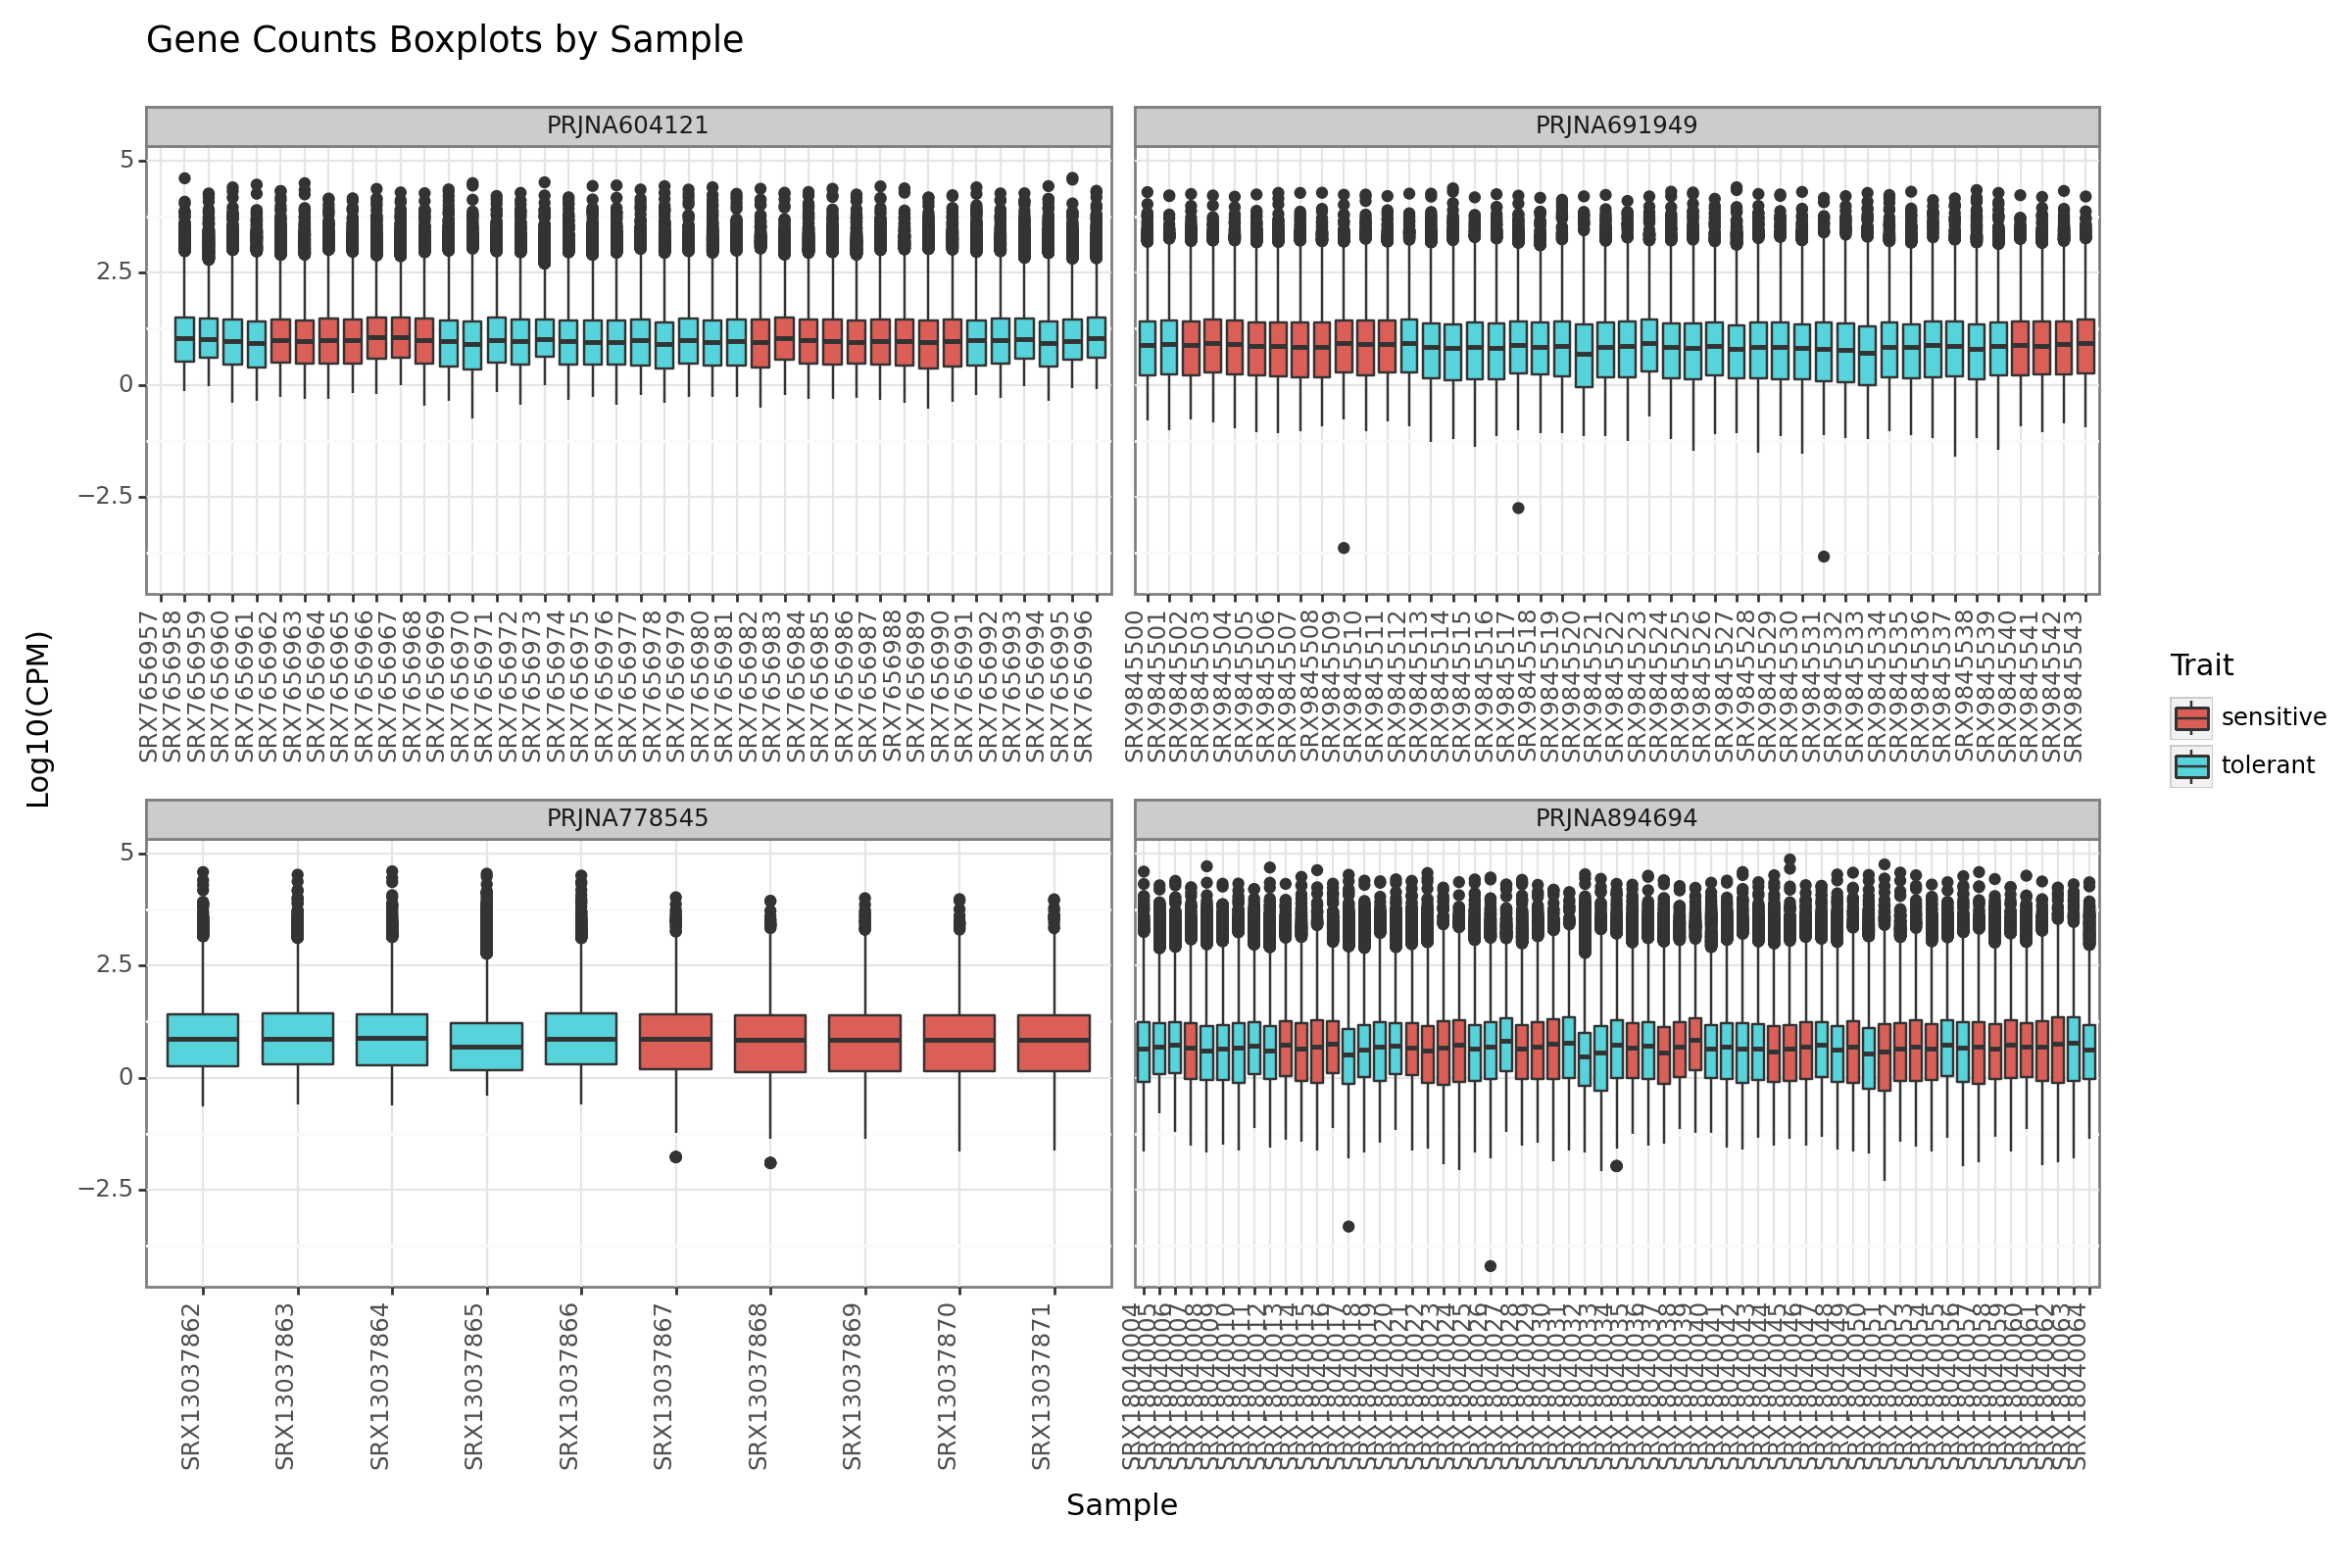

In [45]:
#import library for plotting facet plots
from plotnine import *

# Log-scale the CPM values (handling zeros by replacing them with NaN, if necessary)
cpm_long_format['log_CPM'] = np.log10(cpm_long_format['Count'].replace(0, np.nan))


# Create boxplots for each sample
plot = (
    ggplot(cpm_long_format, aes(x="Sample", y="log_CPM", fill = "Trait")) +
    geom_boxplot() +
    facet_wrap("~BioProject", scales="free_x") +
    labs(title="Gene Counts Boxplots by Sample", y="Log10(CPM)", x="Sample") +
    theme_bw() +    
    theme(axis_text_x=element_text(rotation=90, hjust=1)) +
    theme(figure_size=(12, 8)  # Adjust width and height in inches
    )
)

print(plot)



All samples show fairly even coverage and no super obvious outliers from here. 
The BioProject numbers are not in the same order as the datasets.
From the top left going clockwise the order is Dataset 2, Dataset 4, Dataset 1, and Dataset 3. 

Now I want to try a PCA 

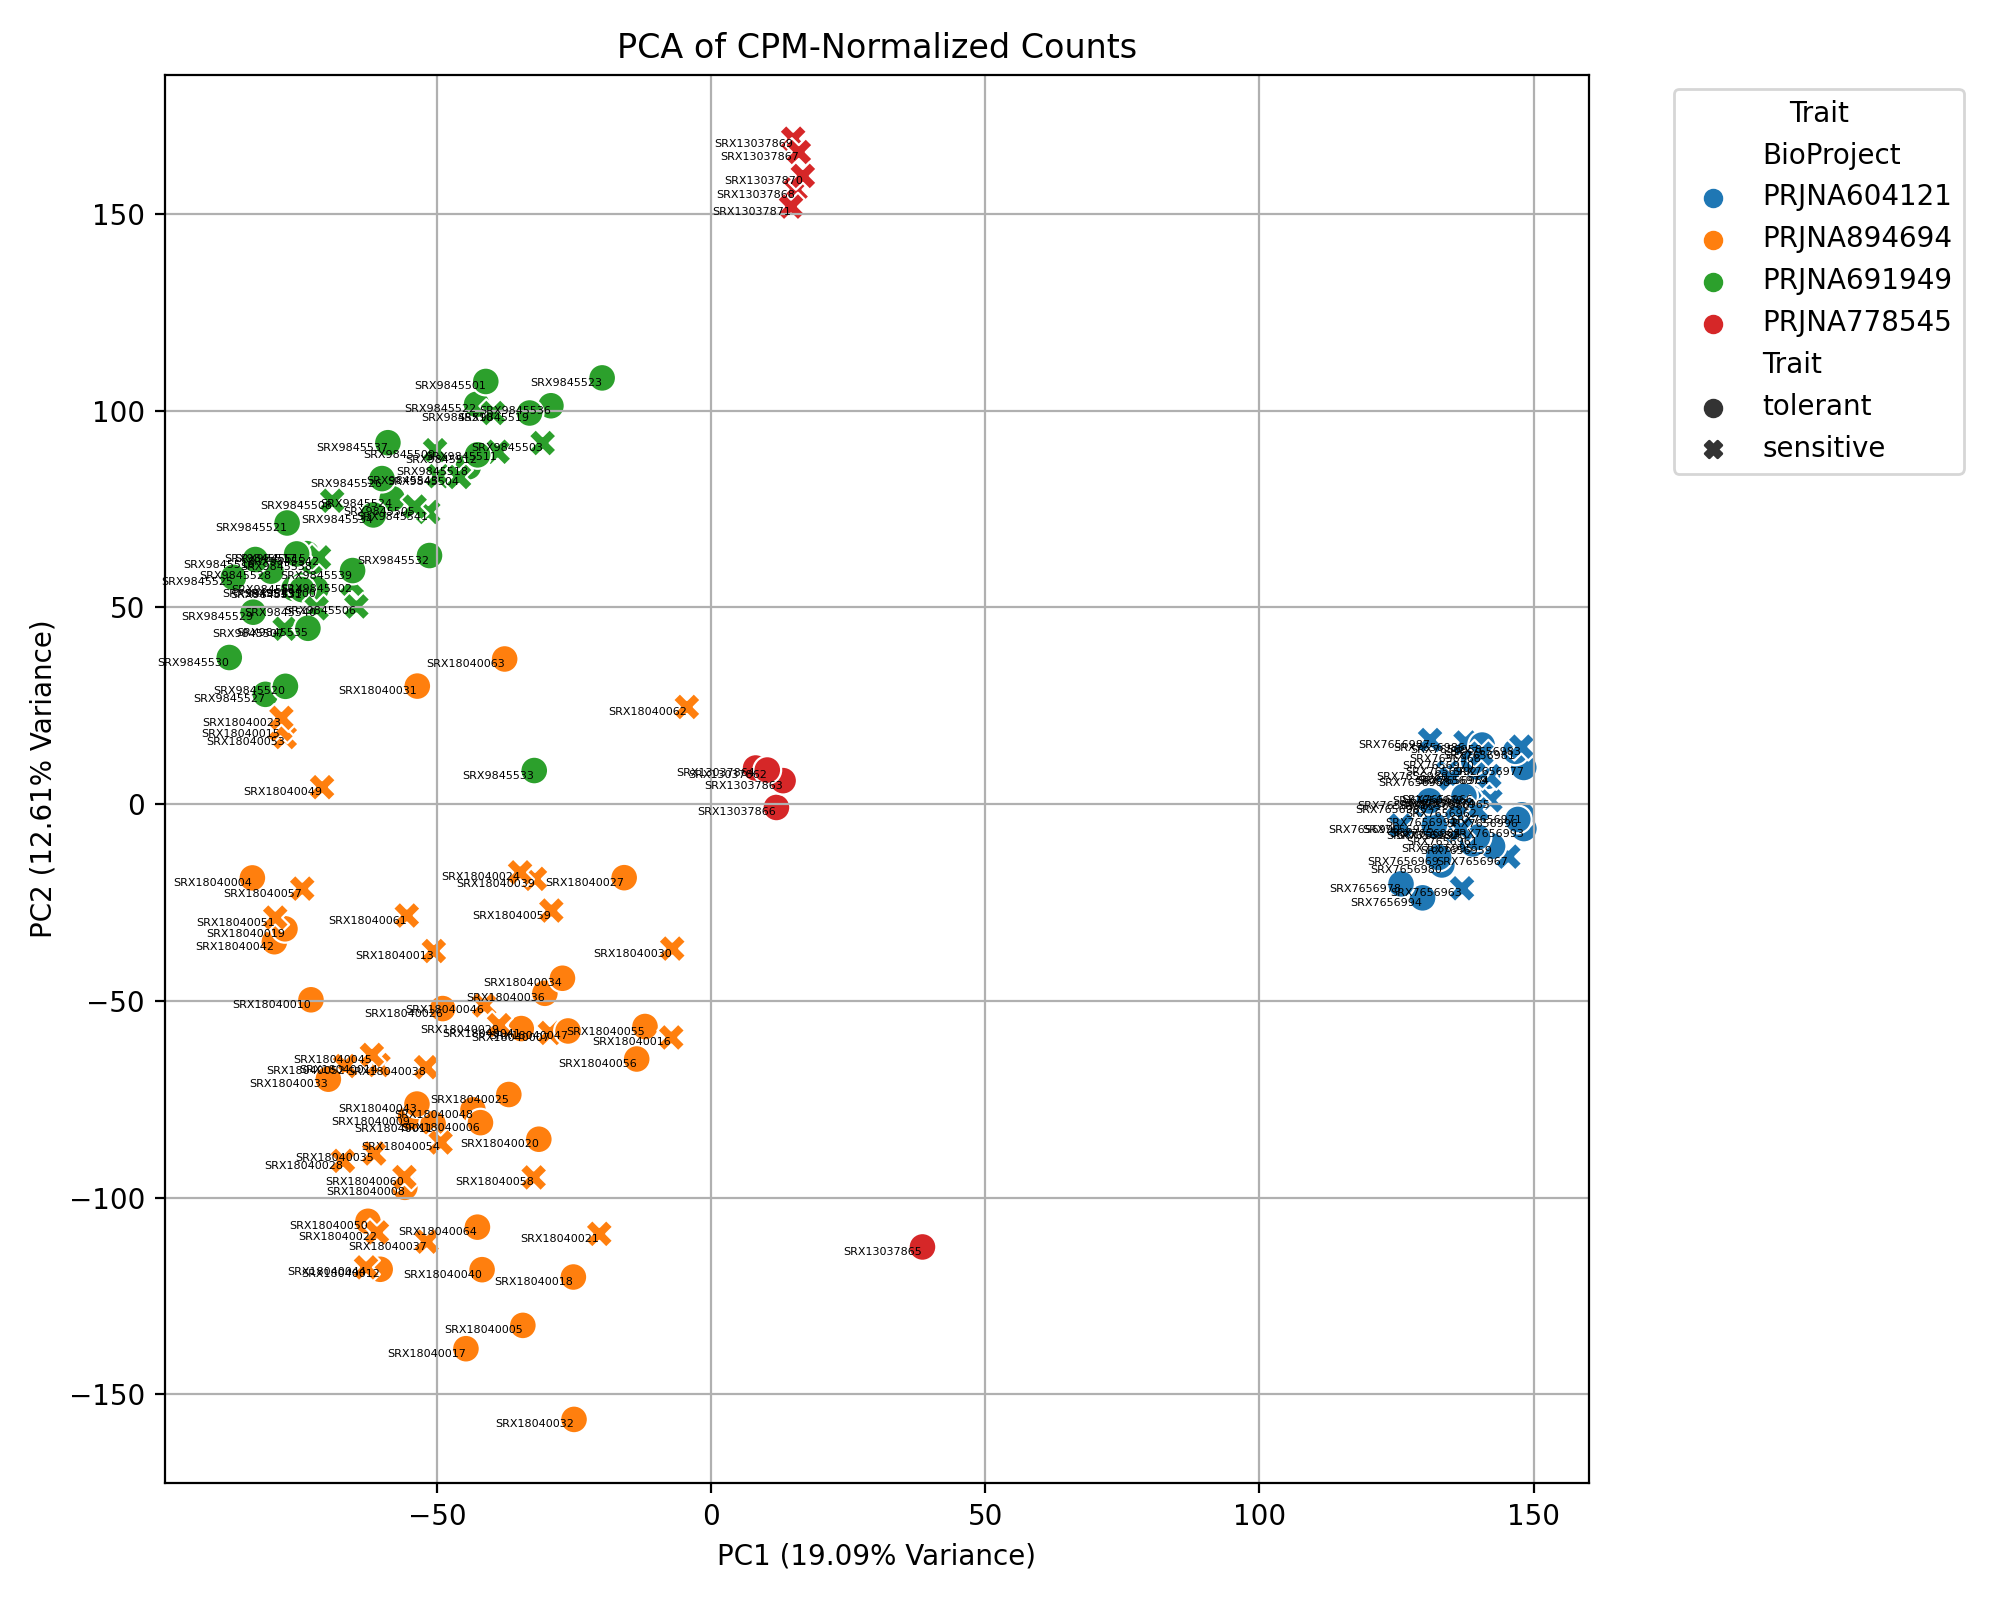

In [49]:
# Transpose the CPM data for PCA (genes as features, samples as rows)
pca_data = cpm_values

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.log10(pca_data + 1))  # Log-transform CPM values

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Sample'] = pca_data.index

# Merge with metadata to color by treatment or batch
pca_df = pd.merge(pca_df, metadata, left_on='Sample', right_on='Sample')

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df, 
    x='PC1', y='PC2', 
    hue='BioProject',  # Color by treatment
    style='Trait',    # Style points by batch
    s=100
)

# Add sample ID annotations
for i, row in pca_df.iterrows():
    plt.text(
        x=row['PC1'], 
        y=row['PC2'], 
        s=row['Sample'], 
        fontsize=4, 
        ha='right', 
        va='top'
    )
    
plt.title('PCA of CPM-Normalized Counts')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)')
plt.legend(title='Trait', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

samples seem to cluster by tissue and study with the green and orange samples being mantle tissue and the red and blue samples being gill tissue. Blue is clustered pretty far from the others and this could be because these samples were in the wild and not in controled environments like the others.

I still want to try the mutual information approach to see if any tolerant-associated genes are identified across studies

In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use('Agg')

log_cpm = cpm_values.apply(lambda x: np.log2(x + 1), axis=1)

log_cpm.head()

,0,1,4,5,6,7,8,9,10,11,...,38259,38260,38261,38262,38263,38532,38533,38704,38740,38761
SRX7656977,0.000000,0.000000,1.827631,1.323235,3.135624,2.487713,0.0,1.464733,0.910780,4.073915,...,8.205516,0.910780,3.531162,5.841066,0.000000,0.0,0.0,0.0,0.0,0.0
SRX7656966,0.000000,0.000000,1.177166,0.000000,1.929399,3.285185,0.0,0.000000,3.297082,4.120782,...,9.074663,1.177166,2.595811,6.187755,1.816659,0.0,0.0,0.0,0.0,0.0
SRX7656986,0.000000,0.806833,2.458435,1.321198,4.422064,2.382305,0.0,0.000000,1.999087,4.642687,...,8.013677,0.000000,3.320832,5.373851,1.999087,0.0,0.0,0.0,0.0,0.0
SRX18040059,0.950678,4.543503,3.476650,0.998034,1.566493,1.891392,0.0,4.796190,1.046865,5.815078,...,8.238630,3.631483,3.114722,5.306596,7.878529,0.0,0.0,0.0,0.0,0.0
SRX18040009,0.090504,2.045576,2.512527,1.687142,1.852797,2.490746,0.0,6.592884,0.930157,5.019401,...,5.622255,2.862691,2.267826,4.181064,6.452909,0.0,0.0,0.0,0.0,0.0


In [55]:
#preview the data before log transformation to confirm it worked
cpm_values.head()

,0,1,4,5,6,7,8,9,10,11,...,38259,38260,38261,38262,38263,38532,38533,38704,38740,38761
SRX7656977,0.000000,0.000000,2.549539,1.502265,7.788546,4.608883,0.0,1.760123,0.880062,15.841110,...,294.193167,0.880062,10.560740,56.323945,0.000000,0.0,0.0,0.0,0.0,0.0
SRX7656966,0.000000,0.000000,1.261322,0.000000,2.808964,8.748529,0.0,0.000000,8.829253,16.397185,...,538.194707,1.261322,5.045288,71.895349,2.522644,0.0,0.0,0.0,0.0,0.0
SRX7656986,0.000000,0.749367,4.496204,1.498735,20.437493,4.213692,0.0,0.000000,2.997469,23.979752,...,257.438378,0.000000,8.992407,40.465832,2.997469,0.0,0.0,0.0,0.0,0.0
SRX18040059,0.932781,22.320120,10.132069,0.997276,1.961839,2.709929,0.0,26.784144,1.066036,55.300596,...,301.047252,11.393255,7.662131,38.577163,234.327949,0.0,0.0,0.0,0.0,0.0
SRX18040009,0.064742,3.128382,4.706188,2.220182,2.611998,4.620684,0.0,95.528547,0.905484,31.433225,...,48.256921,6.273710,3.815968,17.139516,86.603063,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Calculate variance and prepare for mutual information analysis
gene_variances = log_cpm.var(axis=1)
# Select the top 50 most variable genes
top_genes = gene_variances.nlargest(50).index